<a href="https://colab.research.google.com/github/ghazalna/Falcon9-Landing-Predictor/blob/main/k_Nearest_Neighbors_(KNN)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
uploaded=files.upload()

Saving preprocessed_dataset.csv to preprocessed_dataset.csv


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('preprocessed_dataset.csv')

In [5]:
df

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6123.547647,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15600.000000,2,1,1,1,5.0,12,1,0,0,...,0,0,0,0,0,0,0,0,1,0
86,15600.000000,3,1,1,1,5.0,13,1,0,0,...,0,0,0,0,0,0,1,0,0,0
87,15600.000000,6,1,1,1,5.0,12,1,0,0,...,0,0,0,1,0,0,0,0,0,0
88,15600.000000,3,1,1,1,5.0,12,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PayloadMass                          90 non-null     float64
 1   Flights                              90 non-null     int64  
 2   GridFins                             90 non-null     int64  
 3   Reused                               90 non-null     int64  
 4   Legs                                 90 non-null     int64  
 5   Block                                90 non-null     float64
 6   ReusedCount                          90 non-null     int64  
 7   Class                                90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     int64  
 9   Orbit_GEO                            90 non-null     int64  
 10  Orbit_GTO                            90 non-null     int64  
 11  Orbit_HEO                         

### **Machine Learning Prediction**

In [17]:
X= df.drop('Class', axis=1)
y= df['Class']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20 ,random_state=101)

In [24]:
y_test.shape

(18,)

### **k Nearest Neighbors (KNN)**

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn_1 = KNeighborsClassifier()

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}



In [29]:
knn_cv =GridSearchCV(knn_1 , parameters, cv = 10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [30]:
print("Tuned hyperparameters (best parameters): ", knn_cv.best_params_)
print("Accuracy: ", knn_cv.best_score_)

Tuned hyperparameters (best parameters):  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
Accuracy:  0.6589285714285713


In [31]:
best_knn_model = knn_cv.best_estimator_
best_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [32]:
prediction_2 = best_knn_model.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test,prediction_2)

array([[3, 4],
       [3, 8]])

In [36]:
from sklearn.metrics import accuracy_score
raw_accuracy = accuracy_score(y_test, prediction_2, normalize=False)
print("Accuracy (raw count): ", raw_accuracy)

Accuracy (raw count):  11


In [37]:
normalized_accuracy = accuracy_score(y_test, prediction_2, normalize=True)
print("Accuracy (normalized): ", normalized_accuracy)

Accuracy (normalized):  0.6111111111111112


In [38]:
from sklearn.metrics import classification_report

In [39]:
print (classification_report(y_test,prediction_2))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.67      0.73      0.70        11

    accuracy                           0.61        18
   macro avg       0.58      0.58      0.58        18
weighted avg       0.60      0.61      0.60        18



In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()


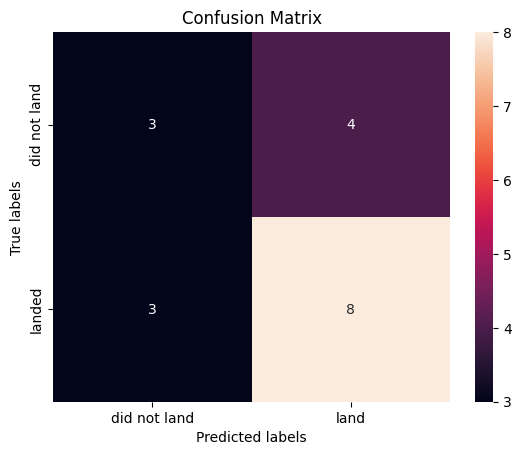

In [45]:

yhat=knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)